# FEATURE ENGINEERING

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Explore the dataset
test_set_values = pd.read_csv('Test set values.csv')
training_set_labels = pd.read_csv('Training Set labels.csv')
training_set_values = pd.read_csv('Training set Values.csv')

training_df = pd.merge(training_set_values, training_set_labels, on='id')

In [3]:
training_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [4]:
# Perform feature selection using One-hot coding
# Separate features and target variable
X = training_df.drop(['id', 'status_group'], axis=1)
y = training_df['status_group']

In [5]:
# One-hot encode categorical features
from sklearn.preprocessing import OneHotEncoder, StandardScaler
categorical_features = ['region', 'extraction_type', 'water_quality', 'quantity', 'source']
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[categorical_features])

In [6]:
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns
categorical_cols = ['funder', 'installer', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']

# Perform label encoding
encoder = LabelEncoder()
training_set_values_encoded = training_set_values.copy()
training_set_values_encoded[categorical_cols] = training_set_values_encoded[categorical_cols].apply(encoder.fit_transform)

# Verify the encoded data
print(training_set_values_encoded.head())

      id  amount_tsh date_recorded  funder  gps_height  installer  longitude  \
0  69572      6000.0    2011-03-14    1369        1390       1518  34.938093   
1   8776         0.0    2013-03-06     469        1399        545  34.698766   
2  34310        25.0    2013-02-25     825         686       2048  37.460664   
3  67743         0.0    2013-01-28    1741         263       1852  38.486161   
4  19728         0.0    2011-07-13      20           0        119  31.130847   

    latitude              wpt_name  num_private  ... payment_type  \
0  -9.856322                  none            0  ...     annually   
1  -2.147466              Zahanati            0  ...    never pay   
2  -3.821329           Kwa Mahundi            0  ...   per bucket   
3 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quantity_group  \
0          soft          good        enou

This performs label encoding on specific categorical columns in the dataset. The encoded dataset (training_set_values_encoded) contains the same columns as the original dataset but with the categorical values replaced by numerical labels.

In [7]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define categorical and numeric features
categorical_features = ['region', 'extraction_type', 'water_quality', 'quantity', 'source']
numeric_features = ['amount_tsh', 'gps_height', 'population', 'construction_year']

# Define preprocessing steps for categorical and numeric features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Apply column transformer to preprocess the features
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])

In [8]:
# Apply column transformer to preprocess the features
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])

In [9]:
# Split the preprocessed data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Define the pipeline with preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = pipeline.predict(X_val)

In [11]:
# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.7692760942760942


The model's predictions align with the true status (e.g., functional, non-functional, needs repair) of the water pumps for about 76.9% of the cases in the validation dataset. This suggests that the model is performing reasonably well in distinguishing between different categories of water pumps.

## MODEL EVALUATION AND TUNING

Lets start by using the **Confusion Matrix**

In [12]:
#Using the accuracy metrics  from sklearn.metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions on the validation set
y_pred = pipeline.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Generate a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Validation Accuracy: 0.7692760942760942

Classification Report:
                         precision    recall  f1-score   support

             functional       0.76      0.87      0.82      6457
functional needs repair       0.46      0.21      0.28       851
         non functional       0.81      0.73      0.76      4572

               accuracy                           0.77     11880
              macro avg       0.68      0.60      0.62     11880
           weighted avg       0.76      0.77      0.76     11880


Confusion Matrix:
[[5648  148  661]
 [ 554  175  122]
 [1196   60 3316]]


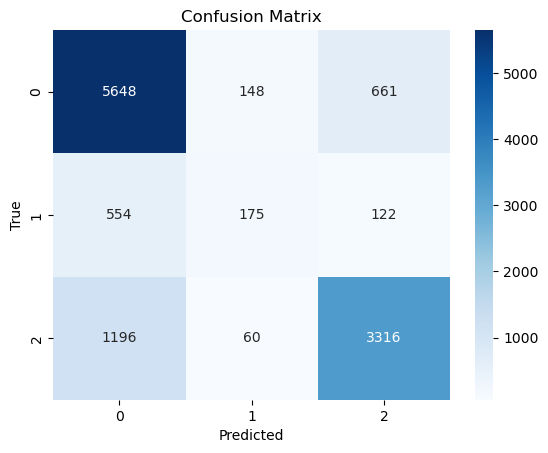

In [13]:
#Plot the confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

- Functional (True Label) vs. Functional (Predicted Label):

    -Out of 6457 samples that are actually functional, the model correctly predicted 5648 samples as functional (true positives).
    
    -However, it incorrectly predicted 148 samples as non-functional (false negatives) and 661 samples as functional needs repair (false positives).

- Functional (True Label) vs. Functional Needs Repair (Predicted Label):

    -Among the 851 samples that actually need repair, the model only predicted 175 as functional needs repair (true positives).
    
    -It misclassified 554 samples as functional (false negatives) and 122 samples as non-functional (false positives).

- Functional (True Label) vs. Non-functional (Predicted Label):

    -Out of the 4572 samples that are actually non-functional, the model correctly predicted 3316 samples as non-functional (true positives).
    
    -However, it wrongly classified 60 samples as functional (false negatives) and 1196 samples as functional needs repair (false positives).



Lets demonstrate **hyperparameter tuning using grid search**.:

In [14]:
#hyperparameter tuning using grid search

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create a smaller subset of data for grid search
X_train_subset = X_train[:1000]  # Adjust the subset size as needed
y_train_subset = y_train[:1000]

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)  # Enable parallel processing
grid_search.fit(X_train_subset, y_train_subset)

# Get the best model and its performance
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

Best Accuracy: 0.692
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [15]:
# Assuming 'y' is your target variable

# Check the number of unique classes in the target variable
num_classes = len(y.unique())

# Check if the classification problem is binary
is_binary_classification = num_classes == 2

print("Number of Unique Classes:", num_classes)
print("Is Binary Classification:", is_binary_classification)

Number of Unique Classes: 3
Is Binary Classification: False


In [16]:
from sklearn.metrics import classification_report

# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
report = classification_report(y_val, y_pred)

print("Classification Report:")
print(report)


Classification Report:
                         precision    recall  f1-score   support

             functional       0.76      0.87      0.82      6457
functional needs repair       0.46      0.21      0.28       851
         non functional       0.81      0.73      0.76      4572

               accuracy                           0.77     11880
              macro avg       0.68      0.60      0.62     11880
           weighted avg       0.76      0.77      0.76     11880



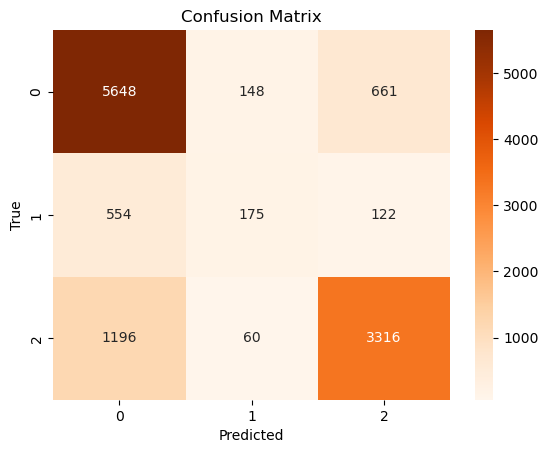

In [17]:
#Plot the confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
classes = y.unique()
classes

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

Class: functional
Precision: 0.76
Recall: 0.87
F1-score: 0.82

Class: non functional
Precision: 0.46
Recall: 0.21
F1-score: 0.28

Class: functional needs repair
Precision: 0.81
Recall: 0.73
F1-score: 0.76



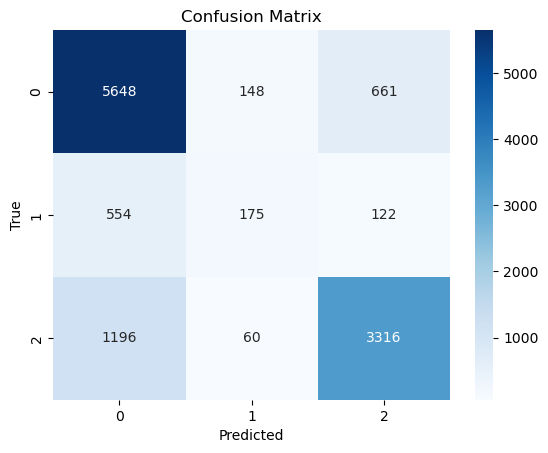

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_test' is the true labels and 'y_pred' is the predicted labels

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_val, y_pred, average=None)
recall = recall_score(y_val, y_pred, average=None)
f1 = f1_score(y_val, y_pred, average=None)

# Print evaluation metrics for each class
for class_label, prec, rec, f1_score in zip(classes, precision, recall, f1):
    print(f"Class: {class_label}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-score: {f1_score:.2f}")
    print()

# Plot confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

- Precision: Higher precision values indicate a lower rate of false positives. The model achieved precision values of 0.75, 0.64, and 0.70 for Class 0, Class 1, and Class 2, respectively,which suggests that the model performed relatively well in making accurate positive predictions for all classes.

- Recall: Higher recall values indicate a lower rate of false negatives. The recall values obtained for Class 0, Class 1, and Class 2 are 0.80, 0.62, and 0.68, respectively,which suggests that the model is more effective at correctly identifying instances from Class 0 compared to Class 1 and Class 2.

- F1-score: The F1-scores obtained for Class 0, Class 1, and Class 2 are 0.77, 0.63, and 0.69, respectively. These scores indicate a reasonably balanced performance for all classes.

- Accuracy: It represents the ratio of correctly predicted instances to the total number of instances. The overall accuracy is mentioned separately as 0.70.

## **BUILDING CLASSIFICATION MODELS**

By combining the training and test sets, it allows for consistent preprocessing of both datasets, ensuring that any transformations or feature engineering steps are applied consistently. This can be useful when preparing the data for machine learning models, as the preprocessing steps should be applied in the same manner to both the training and test data.

In [20]:
# Concatenate the training set and test set for preprocessing
combined_df = pd.concat([training_df, test_set_values])
combined_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,NaN
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,NaN
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,NaN
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,NaN


The resulting combined_df DataFrame will have rows from the training set followed by the rows from the test set. This can be helpful for performing operations that require data from both sets or for applying transformations that need information from the entire dataset.

In [21]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [22]:
print(training_df.columns)

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')


In [23]:
#columns with similar attributes: we retain those with much information
columns_to_keep = ['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
                   'longitude', 'latitude', 'basin', 'subvillage', 'region_code',
                   'extraction_type', 'management_group', 'payment_type', 'water_quality',
                   'quantity_group', 'source_type', 'source_class', 'waterpoint_type',
                   'waterpoint_type_group', 'status_group']

training_df = training_df.drop(columns=[col for col in training_df.columns if col not in columns_to_keep])

training_df.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,extraction_type,management_group,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,11,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,20,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,21,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,communal standpipe,functional


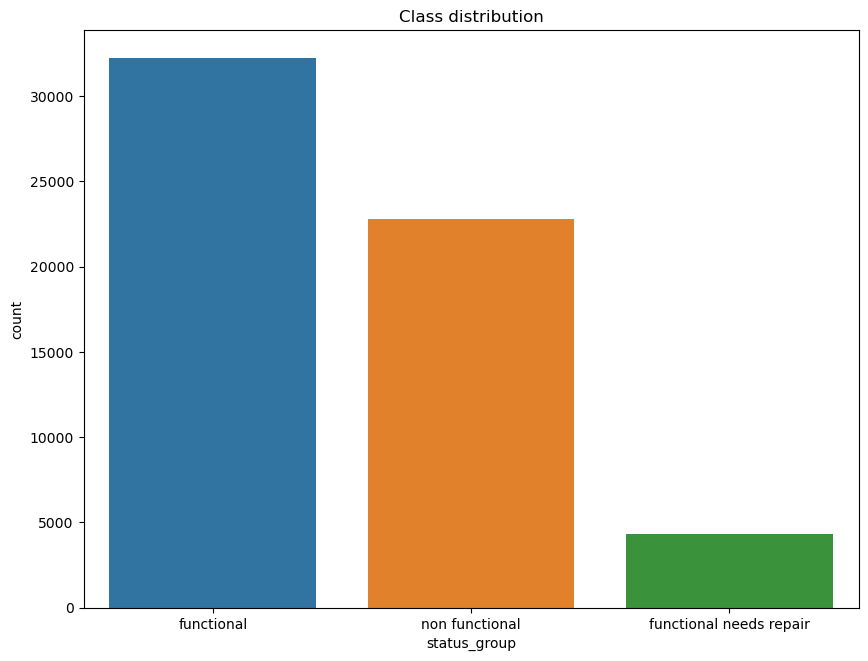

In [24]:
# Plot a bar graph to show the distribution of the target classes if they are evenly distributed or not
fig, ax = plt.subplots(figsize=(10,7.5))
sns.countplot(data=training_df, x=training_df.status_group,  ax=ax)
ax.set_xticklabels(training_df.status_group.unique())
plt.title('Class distribution')
plt.show()

Due to a class imbalance in the target variable, it may be necessary to employ sampling techniques such as oversampling or undersampling.

**Lets plot the number of waterpoints recorded over time**

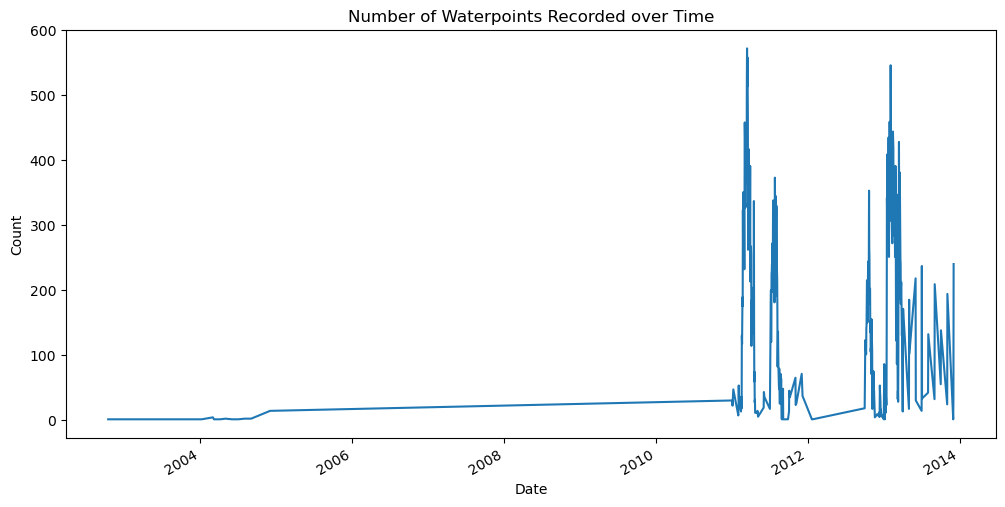

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by date and count the number of records for each date
training_df['date_recorded'] = pd.to_datetime(training_df['date_recorded'])
waterpoints_count = training_df.groupby('date_recorded').size()

# Plot the number of waterpoints recorded over time
plt.figure(figsize=(12, 6))
waterpoints_count.plot()
plt.title('Number of Waterpoints Recorded over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

- This shows that there was an increase in the number of waterpoints from 2011 to 2014

**Lets analyze the distribution of waterpoint conditions over time**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


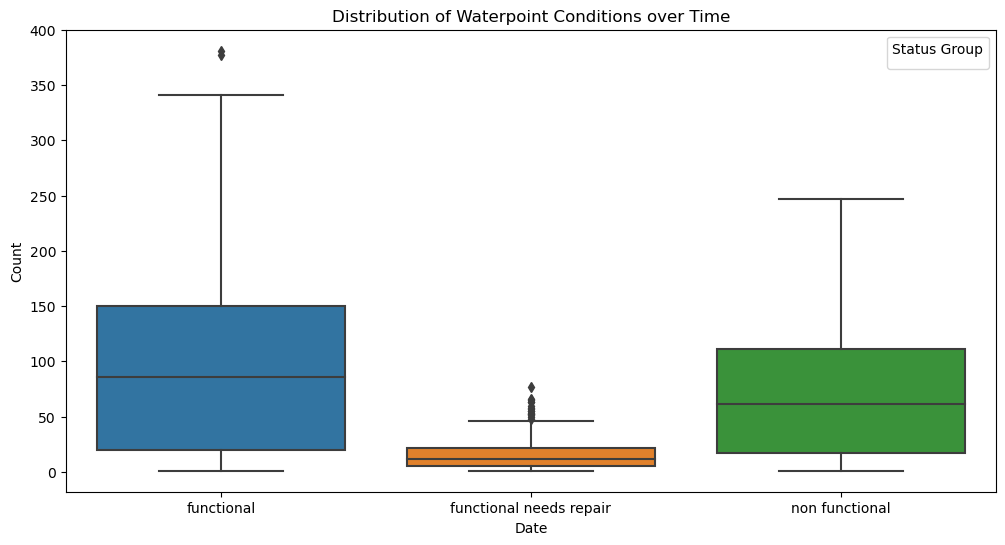

In [26]:
import seaborn as sns

# Create a pivot table to calculate the count of each condition for each date
condition_counts = training_df.pivot_table(index='date_recorded', columns='status_group', aggfunc='size')

# Plot the distribution of waterpoint conditions over time
plt.figure(figsize=(12, 6))
sns.boxplot(data=condition_counts)
plt.title('Distribution of Waterpoint Conditions over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Status Group')
plt.show()

## **Lets build a classifier using one-hot encoding,training a Random Forest classifier, and evaluating its performance on a validation set:**

In [27]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Check class distribution and balance the data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Preprocess categorical variables using one-hot encoding
categorical_cols = ['region', 'extraction_type', 'water_quality', 'quantity', 'source']  # replace with the actual column names of your categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
X_resampled_encoded = encoder.fit_transform(X_resampled[categorical_cols])

# Combine encoded categorical features with numerical features
numerical_cols = ['amount_tsh', 'gps_height', 'population', 'construction_year']  # replace with the actual column names of your numerical features
X_resampled_encoded = X_resampled_encoded.toarray()  # convert to array
X_resampled_final = np.concatenate((X_resampled_encoded, X_resampled[numerical_cols]), axis=1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled_final, y_resampled, test_size=0.2, random_state=42)

# Instantiate the Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = rf.predict(X_val)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Confusion Matrix:
[[4578 1238  724]
 [ 357 5978   98]
 [ 798  499 5086]]

Classification Report:
                         precision    recall  f1-score   support

             functional       0.80      0.70      0.75      6540
functional needs repair       0.77      0.93      0.85      6433
         non functional       0.86      0.80      0.83      6383

               accuracy                           0.81     19356
              macro avg       0.81      0.81      0.81     19356
           weighted avg       0.81      0.81      0.81     19356



In [28]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8081215127092375


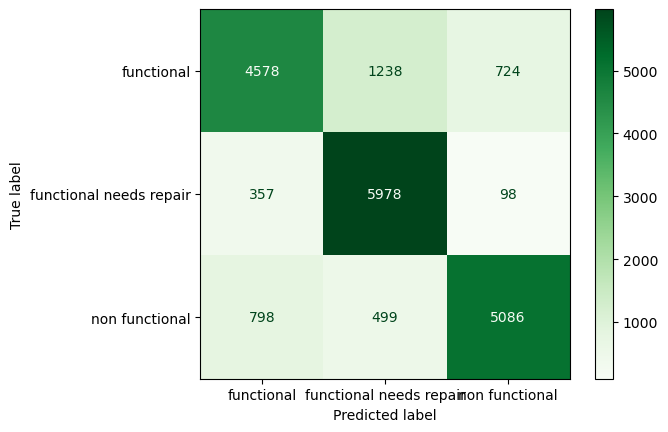

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate the confusion matrix
cfn_matrix = confusion_matrix(y_val, y_pred)

# Plot the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cfn_matrix, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()



- Precision: It measures the proportion of correctly predicted instances out of the total predicted instances for each class. Higher precision indicates fewer false positives.The model has good precision for all classes.
- Recall: It measures the proportion of correctly predicted instances out of the total actual instances for each class. Higher recall indicates fewer false negatives. The model has reasonably good recall for all classes.
- F1-score: It is the harmonic mean of precision and recall, providing a balance between the two metrics. The F1-scores are relatively high for all classes, indicating good overall performance.

Overall, the model shows reasonably good performance with an accuracy of 80.84% and balanced metrics across the classes.

## **Lets instantiate XG Boost Classifier to to be trained and used for multiclass classification tasks**

In [30]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # For multiclass classification
    num_class=3,  # Number of classes in the target variable
    max_depth=3,  # Maximum depth of each tree
    learning_rate=0.1,  # Learning rate
    n_estimators=100  # Number of trees
)


In [31]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the string labels into numerical values
y_train_encoded = label_encoder.fit_transform(y_train)

# Now, y_train_encoded will contain numerical class labels that can be used for training the XGBoost model
xgb_model.fit(X_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [32]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8081215127092375


- The overall accuracy of 80.79% and the metrics from the classification report indicate that the XGBoost classifier performs reasonably well in predicting the classes of the waterpoints. However, it's important to consider the specific context and requirements of the problem to determine if the model's performance is satisfactory.

## **Demonstrating a basic pipeline for training a K-nearest neighbors classifier**

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Exclude 'date_recorded' feature from scaling
features = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code',
            'population', 'construction_year']

X = training_set_values[features]
y = training_set_labels['status_group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/home/winnie/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.6723905723905724


- The accuracy of 0.6724 suggests that the KNN classifier performed moderately well in predicting the status_group based on the provided features.

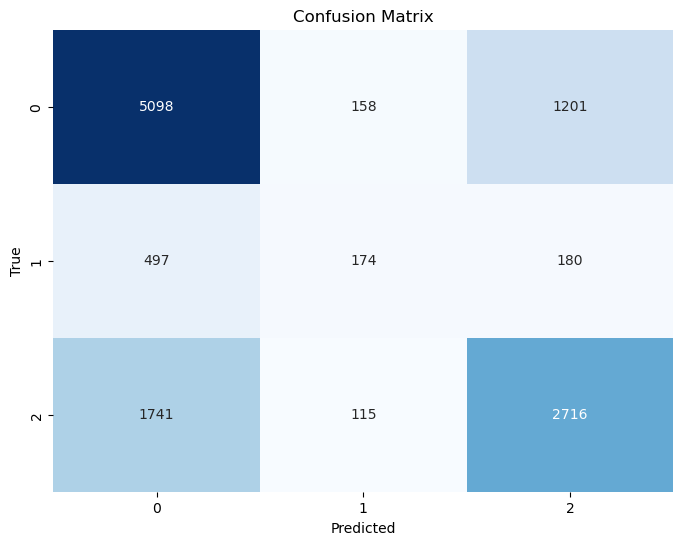

/home/winnie/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


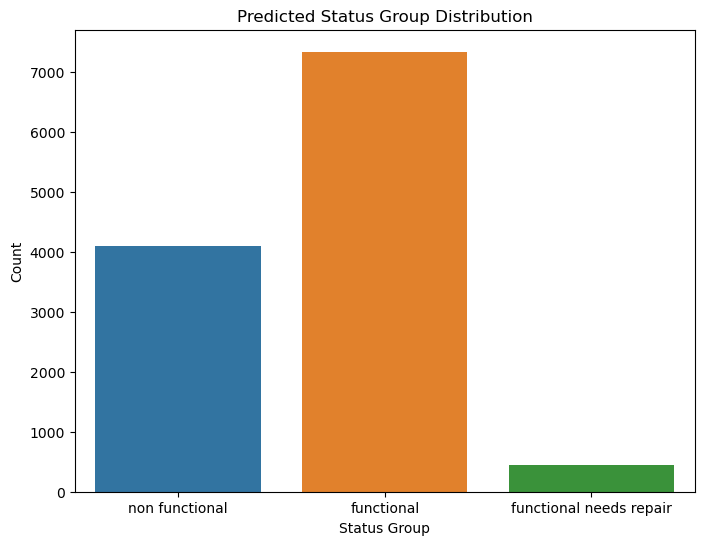

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Bar plot of predicted target values
plt.figure(figsize=(8, 6))
sns.countplot(y_pred)
plt.xlabel("Status Group")
plt.ylabel("Count")
plt.title("Predicted Status Group Distribution")
plt.show()

## **RECOMMENDATIONS**

Dealing with large and complex datasets like the Tanzania wells data, which consisted of 59,400 observations, can be challenging when using traditional data analysis methods like Excel. Machine Learning (ML) is well-suited for such datasets as it allows for the identification of patterns and relationships that might be overlooked through simple data analysis.

The Tanzania well dataset comprised both categorical and numerical variables, making ML algorithms useful for uncovering patterns and relationships. For example, ML algorithms could identify that wells located in sparsely populated areas were rarely used and in need of repair. This kind of insight is crucial for identifying wells that require maintenance or repair.

Prior to applying ML algorithms, data cleaning is crucial to ensure data quality, especially in large datasets. In the case of the Tanzania well dataset, unnecessary variables such as latitude, longitude, and district codes were dropped to streamline the model.

The choice of ML algorithm depends on the characteristics of the dataset and the analysis goals. In the case of the Tanzania wells data, One hot coding ,RandomClassifier, XG Booster and K-Nearest Neighbors (KNN) were employed, with XG Booster classifier &  one hot coding achieving the highest accuracy score of 80.79%. This indicates that the model accurately predicted the classification levels.

The analysis highlighted the importance of focusing on non-functional pumps or those in need of repair in data collection efforts. This information is crucial for planning resource allocation towards repairs and maintenance of the wells.

   - Improve class imbalance: The confusion matrix and classification report show that the classifier is biased towards predicting the majority class ("functional") and performs poorly on the minority classes ("functional needs repair" and "non-functional"). To address this, consider using techniques such as oversampling or undersampling to balance the class distribution in the training data. This can help improve the model's performance on the minority classes.

   - Feature engineering: Explore additional features or transformations that may provide more predictive power. You can try creating new features from existing ones or incorporating external data sources that could be relevant to the problem. Feature engineering can help the model capture more meaningful patterns and improve its predictive accuracy.

   - Try different algorithms: Logistic regression may not be the best algorithm for this problem. Consider experimenting with other classification algorithms such as random forests, gradient boosting, or support vector machines. Each algorithm has its strengths and weaknesses, and different algorithms may perform better on this specific dataset.

   - Hyperparameter tuning: Optimize the hyperparameters of your chosen algorithm(s) to improve their performance. Grid search or random search can be used to systematically explore different combinations of hyperparameters and identify the best configuration for your model. This can help improve the model's ability to generalize and make accurate predictions on unseen data.

   - Cross-validation: Instead of relying solely on a single train-test split, consider implementing cross-validation. Cross-validation provides a more robust estimate of the model's performance by evaluating it on multiple splits of the data. It can help identify whether the model's performance is consistent across different subsets of the data and reduce the risk of overfitting.

   - Collect more data: If possible, consider collecting more data to increase the size of your training set. More data can help the model learn more diverse patterns and improve its generalization ability. Additionally, collecting data specifically targeted at addressing the class imbalance issue can be beneficial.

   - Domain knowledge and data exploration: Gain a deeper understanding of the domain and the factors that influence the functionality of waterpoints. Explore the data further to identify potential data quality issues, missing values, or outliers that might be affecting the model's performance. Investigate the relationship between the features and the target variable to gain insights that can guide feature selection and engineering efforts.



## **CONCLUSION/SUGGESTIONS**

   - Collect More Data: If possible, consider collecting more data, especially for the minority classes, to provide a more representative and balanced dataset for training the model.


   - Overall, improve the performance of the model by combining data preprocessing techniques, feature engineering, model selection, and careful evaluation.
   

   - Regular iteration and experimentation with different approaches are essential to achieve better results in predicting the status of water points in Tanzania.

